# Methods to to solve for Klinkenberg Permeability from Permeability to air:

Recently, while exploring PermInc.com, I stumbled upon an intriguing approach utilizing the Newton-Raphson method to convert permeability to air measurements into Klinkenberg permeability. While the website provided an outline, understanding and implementing the concept required translating it into Python code. Additionally, delving deeper, I reviewed API Recommended Practices RP-40.

In RP-40's appendix, Jones introduced a correlation for helium's b (Klinkenberg gas slippage factor) using an equation (A-7):

    b_Helium = 16.4 * Kl^(-0.382)

Where 'b' represents the Klinkenberg gas slippage factor in psi and 'Kl' denotes the Klinkenberg Permeability in mD. The document suggests calculating 'b_air' by substituting 16.4 with 5.71:

    b_air = 5.71 * Kl^(-0.382)

Applying equation 21 of RP-40, which relates to air:

    Kair = Kl * (1 + b_air / p_mean)

For air, this equation simplifies to:

    Kair = Kl + 5.71 * Kl^(1 - 0.382) / p_mean

This equation can be reformulated as:

    5.71 * Kl^0.618 + Kl * p_mean - Kair * p_mean = 0

The Newton-Raphson method necessitates the derivative of the function concerning the variable being solved for (in this instance, Kl) to iteratively converge towards the solution.

The derivative of the function f(Kl) = 5.71 * Kl^0.618 + Kl * p_mean - Kair * p_mean with respect to Kl is derived as follows:

    f'(Kl) = df(Kl)/dKl = 5.71 * 0.618 * Kl^(-0.382) + p_mean

This derivative, f'(Kl), is crucial in updating the guessed value for Kl iteratively. It assists in determining how to update the guess to converge towards the root (or solution) of the equation.

The python code for the Newton-Raphson, SciPy Optimization  and excel spreadsheet can be found on this GitHub repository.

All 3 coded examples provide the same estimated for Klinkenberg permeability based on the given data from RP-40 utilized in equation 31, resulting in an estimated Kl of 10.61, where in RP-40 the Klinkenberg Permeability is 10.62, indicating a close approximation.

For further details, refer to [PermInc.com](https://perminc.com/resources/fundamentals-of-fluid-flow-in-porous-media/chapter-2-the-porous-medium/permeability/) and the work of Jones (SPE 16949, 1987).

```python
    # Given data
    K_air_mD   = 11.97  # Measured permeability to air in mD
    p_mean_psi = 18     # Mean pressure in psi

    # Function to solve for Kl using Newton-Raphson method
    def calculate_Klinkenberg(K_air_mD, p_mean_psi):
        # Initial guess for Kl
        Kl = K_air_mD / 2  # Initial guess can be adjusted if needed

        # Define the function that needs to be solved to find Kl
        def f(Kl_guess):
            return 5.71 * (Kl_guess**(0.618)) + Kl_guess * p_mean_psi - K_air_mD * p_mean_psi

        # Define the derivative of the function for Newton-Raphson method
        def df(Kl_guess):
            return 5.71 * 0.618 * (Kl_guess**(-0.382)) + p_mean_psi

        # Set tolerance and maximum iterations for convergence
        tolerance = 1e-6
        max_iterations = 100
        
        iteration = 0
        while True:
            Kl_new = Kl - f(Kl) / df(Kl)

            if abs(Kl_new - Kl) < tolerance or iteration >= max_iterations:
                break

            Kl = Kl_new
            iteration += 1

        return Kl_new

    # Calculate Klinkenberg permeability using the function
    estimated_Kl = calculate_Klinkenberg(K_air_mD, p_mean_psi)
    print(f"The estimated Klinkenberg permeability is {estimated_Kl:.2f} mD.")
```

This code defines a function `calculate_Klinkenberg` that uses the Newton-Raphson method to iteratively solve for Kl given the provided equations and parameters. The initial guess for Kl is set to half the measured permeability to air, but this can be adjusted depending on the specific characteristics of the problem.

Running this code will output the estimated Klinkenberg permeability in milliDarcy (mD) based on the provided equations and iterative method. 

In the Newton-Raphson method, the derivative of the function with respect to the variable being solved for (in this case, Kl) is required to iteratively converge towards the solution. 

In the given equation:

    f(Kl) = 5.71 * Kl**{0.618} + Kl * p_mean - K_air * p_mean

The derivative of this function with respect to Kl can be calculated using standard differentiation rules. The derivative of the function f(Kl) with respect to Kl is denoted as f'(Kl) or df(Kl)/dKl. Applying the power rule and the derivative of a constant multiplied by a function, we get:

    f'(Kl) = df(Kl)/dKl = 5.71 * 0.618 * Kl**{0.618 - 1} + p_mean
    
    f'(Kl) = df(Kl)/dKl = 5.71 * 0.618 * Kl**{-0.382} + p_mean

This derivative, f'(Kl), is used in the Newton-Raphson method to update the guess for Kl iteratively. The derivative helps to find the rate of change of the function with respect to Kl at a particular point, which aids in determining how to update the guess to converge towards the root (or solution) of the equation.

In the provided Python code, the derivative function is defined as `df(Kl_guess)` and is used within the Newton-Raphson iteration to calculate the updated value of Kl. This iterative process continues until the difference between successive approximations falls below a specified tolerance or until a maximum number of iterations is reached.

In [1]:
# Given data
K_air_mD = 11.97  # Measured permeability to air in mD
p_mean_psi = 18.0  # Mean pressure in psi


# Function to solve for Kl using Newton-Raphson method
def calculate_Klinkenberg(K_air_mD, p_mean_psi):
    # Initial guess for Kl
    Kl = K_air_mD / 2  # Initial guess can be adjusted if needed

    # Define the function that needs to be solved to find Kl using 5.71 for the b multiplier for b_air
    def f(Kl_guess):
        return 5.71 * (Kl_guess ** 0.618) + Kl_guess * p_mean_psi - K_air_mD * p_mean_psi

    # Define the derivative of the function for Newton-Raphson method
    def df(Kl_guess):
        return 5.71 * 0.618 * (Kl_guess ** -0.382) + p_mean_psi

    # Set tolerance and maximum iterations for convergence
    tolerance = 1e-6
    max_iterations = 100
    iteration = 0
    while True:
        Kl_new = Kl - f(Kl) / df(Kl)

        if abs(Kl_new - Kl) < tolerance or iteration >= max_iterations:
            break

        Kl = Kl_new
        iteration += 1
        
        print(iteration)
        
    return Kl_new

# Calculate Klinkenberg permeability using the function
estimated_Kl = calculate_Klinkenberg(K_air_mD, p_mean_psi)
print(f"The estimated Klinkenberg permeability is {estimated_Kl:.2f} mD.")


1
2
3
The estimated Klinkenberg permeability is 10.61 mD.


This method works welll. 

# This is a test of SymPy used to calculate the derivative of our root equation and then use this in our Newton-Raphson code:

**SymPy is pretty cool and might come in handy at some point to calculate the derivative of a more complex equation**

In [2]:
from sympy import symbols, diff

# Define the symbols
Kl_guess, p_mean_psi, K_air_mD = symbols('Kl_guess p_mean_psi K_air_mD')

# Define the function
fx = 5.71 * (Kl_guess ** 0.618) + Kl_guess * p_mean_psi - K_air_mD * p_mean_psi

# Calculate the derivative
derivative_fx = diff(fx, Kl_guess)

print('derivative_fx =',derivative_fx)
print()
derivative_fx

derivative_fx = 3.52878/Kl_guess**0.382 + p_mean_psi



3.52878/Kl_guess**0.382 + p_mean_psi

SymPy has given us the derivative of fx, and now we want to apply it on our code. 

We wiil first break down the process, step-by-step, and explain how we're using the symbolic differentiation obtained using SymPy to create a df(x) in our Newton-Raphson code.

### Step 1: Define the Function f_x
We start by defining the function f_x that we want to find the root of. In our case:

fx = 5.71 * (Kl_guess ** 0.618) + Kl_guess * p_mean_psi - K_air_mD * p_mean_psi

```python
from sympy import symbols

# Define the symbols
Kl_guess, p_mean_psi, K_air_mD = symbols('Kl_guess p_mean_psi K_air_mD')

# Define the function fx
fx = 5.71 * (Kl_guess ** 0.618) + Kl_guess * p_mean_psi - K_air_mD * p_mean_psi
```

### Step 2: Calculate the Derivative of \(f_x\) Using SymPy
Next, we calculate the derivative of fx with respect to Kl_guess.

```python
from sympy import diff

# Calculate the derivative of fx with respect to Kl_guess
derivative_fx = diff(fx, Kl_guess)
```

### Step 3: Prepare Newton-Raphson Method
Now, we'll prepare the Newton-Raphson method. Here, we aim to find the root of fx by iteratively applying Newton's method. To do this, we convert the symbolic derivative into a numerical function using `lambdify` to get the slope at a given point.

```python
from sympy import lambdify

# Use lambdify to convert the derivative expression into a numerical function
df = lambdify(Kl_guess, derivative_fx, modules='numpy')

# Implement Newton-Raphson to find the root of fx
def calculate_Klinkenberg(K_air_mD, p_mean_psi):
    Kl = K_air_mD / 2  # Initial guess
    tolerance = 1e-6
    max_iterations = 100
    iteration = 0
    
    while True:
        Kl_new = Kl - fx.subs(Kl_guess, Kl) / df(Kl)
        
        if abs(Kl_new - Kl) < tolerance or iteration >= max_iterations:
            break
        
        Kl = Kl_new
        iteration += 1
        
    return Kl_new
```

### Step 4: Find the Root Using Newton-Raphson Method
Finally, we call the function `calculate_Klinkenberg` to find the root of fx (i.e., the value of Kl_guess that makes fx zero).

```python
# Given data
K_air_mD = 11.97  # Measured permeability to air in mD
p_mean_psi = 18.0  # Mean pressure in psi

# Call the function to estimate Klinkenberg permeability using the Newton-Raphson method
estimated_Kl = calculate_Klinkenberg(K_air_mD, p_mean_psi)
print(f"The estimated Klinkenberg permeability is {estimated_Kl:.2f} mD.")
```

This process encapsulates the use of the Newton-Raphson method to find the root of a function by employing the symbolic differentiation to obtain the derivative function required for the method to converge to the root of fx, and this is the full code of using SymPy.


In [3]:
from sympy import symbols, diff, lambdify

# Function to solve for Kl using Newton-Raphson method
def calculate_Klinkenberg(K_air_mD, p_mean_psi):
    # Initial guess for Kl
    Kl = K_air_mD / 2  # Initial guess can be adjusted if needed

    # Define the function that needs to be solved to find Kl using 5.71 for the b multiplier for b_air
    def f(Kl_guess):
        return 5.71 * (Kl_guess ** 0.618) + Kl_guess * p_mean_psi - K_air_mD * p_mean_psi

    # Use lambdify to convert the derivative expression into a numerical function
    df = lambdify(Kl_guess, derivative_fx, modules='numpy')

    # Set tolerance and maximum iterations for convergence
    tolerance = 1e-6
    max_iterations = 100
    
    iteration = 0
    while True:
        Kl_new = Kl - f(Kl) / df(Kl)

        if abs(Kl_new - Kl) < tolerance or iteration >= max_iterations:
            break

        Kl = Kl_new
        
        iteration += 1
        
        print(iteration)
        
    return Kl_new

# Given data
K_air_mD = 11.97  # Measured permeability to air in mD
p_mean_psi = 18.0  # Mean pressure in psi

# Define the symbols
Kl_guess = symbols('Kl_guess')

# Define the function fx
fx = 5.71 * (Kl_guess ** 0.618) + Kl_guess * p_mean_psi - K_air_mD * p_mean_psi

# Calculate the derivative
derivative_fx = diff(fx, Kl_guess)

# Call the function to estimate Klinkenberg permeability using the updated derivative
estimated_Kl = calculate_Klinkenberg(K_air_mD, p_mean_psi)
print(f"The estimated Klinkenberg permeability is {estimated_Kl:.2f} mD.")


1
2
3
The estimated Klinkenberg permeability is 10.61 mD.


In [4]:
derivative_fx

3.52878/Kl_guess**0.382 + 18.0

# Use of SciPy Optimization:

In the context of solving the same equation for root-finding or minimizing the function representing the equation, it's expected that different optimization techniques or methods that converge successfully should provide similar or identical solutions if the methods are implemented correctly and the functions are well-behaved.

In the next examples we are using a different optimization approaches (`root_scalar` with Newton-Raphson, and `minimize` with least squares minimization), the goal was to find the root of the equation f(x) = 0 by employing distinct optimization strategies. If these methods converge successfully, they should yield very close or identical estimates for the root, given the same initial conditions and convergence criteria.

Therefore, observing similar results between the different optimization methods applied to the same problem (root-finding) confirms that the methods are effectively finding the root or solution to the equation f(x) = 0 in a consistent manner.

This consistency in results across different optimization techniques provides additional confidence in the accuracy of the estimated solution for the root of the equation f(x) = 0 given the specific function and initial conditions used in the examples.

In [5]:
from scipy.optimize import root_scalar

# Define the function and its derivative
def f(x):
    return 5.71 * (x ** 0.618) + x * p_mean_psi - K_air_mD * p_mean_psi

def df(x):
    return 5.71 * 0.618 * (x ** -0.382) + p_mean_psi

# Given data
K_air_mD = 11.97  # Measured permeability to air in mD
p_mean_psi = 18.0  # Mean pressure in psi

# Initial guess for the root
x_initial_guess = K_air_mD / 2  # Initial guess can be adjusted if needed

# Use scipy.optimize.root_scalar to find the root
root = root_scalar(f, fprime=df, x0=x_initial_guess, method='newton')

if root.converged:
    estimated_Klinkenberg = root.root
    print(f"The estimated Klinkenberg permeability is {estimated_Klinkenberg:.2f} mD.")
else:
    print("Root finding did not converge.")


The estimated Klinkenberg permeability is 10.61 mD.


In [6]:
from scipy.optimize import minimize

# Define the function
def objective_function(x):
    return (5.71 * (x ** 0.618) + x * p_mean_psi - K_air_mD * p_mean_psi) ** 2
    #return 5.71 * (x ** 0.618) + x * p_mean_psi - K_air_mD * p_mean_psi

# Given data
K_air_mD = 11.97  # Measured permeability to air in mD
p_mean_psi = 18.0  # Mean pressure in psi

# Initial guess for the root
x_initial_guess = K_air_mD / 2  # Initial guess can be adjusted if needed

# Use scipy.optimize.minimize to find the root (solution to f(x) = 0)
result = minimize(objective_function, x_initial_guess, method='Nelder-Mead', tol=1e-6)

if result.success:
    estimated_Klinkenberg = result.x[0]
    print(f"The estimated Klinkenberg permeability is {estimated_Klinkenberg:.2f} mD.")
else:
    print("Optimization did not converge.")


The estimated Klinkenberg permeability is 10.61 mD.


The choice of optimization method depends on various factors such as the properties of the function, availability of derivatives, computational resources, convergence behavior, and the specific problem at hand. Each optimization method has its strengths and limitations. Here's a summary of considerations for the methods discussed:

1. **Newton-Raphson Method:**
   - Requires both the function and its derivative.
   - Converges rapidly for well-behaved functions when a good initial guess is provided.
   - May not converge or converge to a local minimum/maximum for poorly behaved functions.
   - Efficient if derivatives can be computed accurately.

2. **`scipy.optimize.root_scalar`:**
   - Specifically designed for root-finding.
   - Utilizes different algorithms including Newton-Raphson, secant, Brent's method, etc.
   - Requires fewer function evaluations than `scipy.optimize.minimize`.
   - May be more straightforward to use for root-finding problems.

3. **`scipy.optimize.minimize`:**
   - General-purpose optimization tool that can solve root-finding problems by minimizing a function (like least squares minimization).
   - Doesn't require derivatives in some methods (e.g., Nelder-Mead) but can benefit from derivatives for faster convergence in others.
   - Suitable for more general optimization problems beyond root-finding.

Given your specific problem of finding the root of the equation \(f(x) = 0\) for the Klinkenberg permeability, if you have access to derivatives and are mainly focused on root-finding, using `scipy.optimize.root_scalar` with the Newton-Raphson method could be a good choice. This method tends to converge quickly if a good initial guess is provided and if the function behaves well around the root.

However, for a more general optimization problem or when derivatives are not easily computable, using `scipy.optimize.minimize` with appropriate methods, such as Nelder-Mead, can be versatile and may not require derivative information.

Ultimately, the choice should be based on the specific characteristics of your function, computational requirements, availability of derivative information, and the level of confidence you seek in the convergence behavior of the optimization method. It might be beneficial to experiment with different methods and compare their performance for your particular problem to determine the most suitable one.


---
---
# Calculate Klinkenberg Permeability(kl) from kair (called kg in this instance) using equation 31 from RP-40, which is a more rigorous approach to the calculation of Klinkenberg Permeability

---
## Directly quoted from RP40 to capture original intent: 

"Due to the historical prevalence of steady-state axial gas permeability measurements made without the Klinkenberg correction, huge data bases have been developed from these measurements. It is often desired to compare new data with previous measurements on the same reservoir. To do this, k∞ must be “uncorrected” for gas slippage. The non-slip-corrected permeability, k , for any gas at any desired temperature and mean pore pressure can be calculated from a measured k∞ and b as follows:

    a. Calculate the sample’s “gas slippage radius,” r , (from b Equation 13 in 6.2.1.1) using appropriate values of molecular weight, viscosity, and the b obtained for the gas used in the measurement at the absolute temperature of the measurement.

    b. From this rb , find b from Equation 12 for the new gas, using its molecular weight and viscosity at the desired temperature.

    c. From the new b, the measured k∞, and the desired mean pore pressure,calculate kg for the new gas from Equation 21.

---

" end of RP-40


RP-40 combines all of this into a single equation they refer to as equation 31:


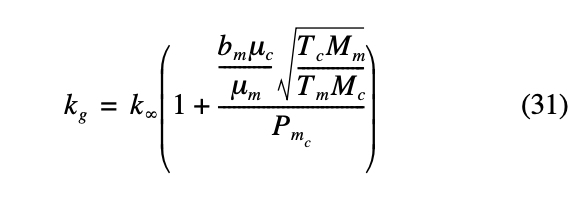

- The subscript **m** in equation 31 refers to the **measurement** gas or condition, 
- The subscript **c** refers to the **desired gas or condition** for which k is to be calculated. 

An example of the use of Equation 31 is shown in our document. For our example rock and **m** subscript data we are using:
- The measured Klinkenberg Permeability is 10.62 millidarcys
- b_Helium is 6.57 psi using helium at 72°F. 
- The molecular weight of helium is 4.0026, and its viscosity at 72°F is 0.01967 cp. 

To relate this Klinkenberg permeability to Permeability to air from olded data taken from the same formation, it is desired to calculate k_air at a mean pore pressure of 18.0 psia and temperature of 75°F using the following **c** subscript data too:  
- The average molecular weight of air is 29.0, and its viscosity at 75°F is 0.01837 cp. 

Using Equation 31, we can solve for k_air at 75°F with a mean pore pressure of 18.0 psia:

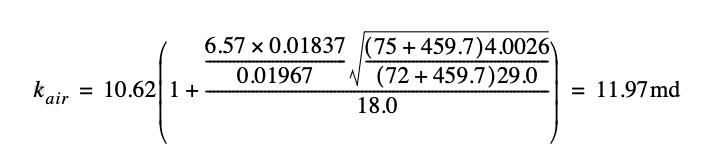



In an attempt to capture the original intent of RP-40 and apply this example, we wrote this into python code. However our intent is to correct our Permeability to air measurements to Klinkenberg Permeability to use as as a permeability calibration source. Equation 31 is written:

    kg = kl * (1 +   (bm * uc / um)  *  np.sqrt(  ((Tc+459.7)*Mm) / ((Tm+459.7)*Mc)) /  Pmc)

    kg = 10.62 * (1 +   (6.57*0.01837/0.01967)  *  np.sqrt(  ((75+459.7)*4.0026) / ((72+459.7)*29)) /  18.0)

and we can rearrange the equation to calculate Klinkenberg Permeability from Permeability to air:

    kl = kg / (1 + (bm * uc / um)  *  np.sqrt(  ((Tc+459.7)*Mm) / ((Tm+459.7)*Mc)) /  Pmc)


In [7]:
import pandas as pd
import numpy as np

kl = 10.62

""""
Air:

For purposes of comparing this measurement with old data taken on the same formation, it is desired to calculate k air at a 
The c subscript refers to the desired gas or condition for which kg is to be calculated. 

- mean pore pressure of 18.0 psia and temperature of 75°F. 

- The average molecular weight of air is 29.0, and its viscosity at 75°F is 0.01837 cp. 

- kair at 75°F and 18.0 psia
"""
Tc = 75  # Air Temperature in DegF for kg
Tcc = (Tc-32)/1.8 + 273.15
μc = ((14.969 * Tcc**1.5) /(Tcc + 120)) * 0.0001
Mc = 29  # Molecular weight for air for kg


"""

To illustrate the use of Equation 31, suppose that for a particular rock, 

Helium:

- the measured k and b are 10.62 millidarcys and 6.57 psi, respectively, using helium at 72°F. 

- The molecular weight of helium is 4.0026, and its viscosity at 72°F is 0.01967 cp. 
"""
bm = 6.57  # Klinkenberg intercept for helium in psi

# Constants for the calculation using Helium
Tm = 72  # Helium Temperature in DegF for kl
Tmm = (Tm-32)/1.8 + 273.15
μm = (187.0 * (Tmm/273.1)**0.685) * 0.0001
Mm = 4.0026  # Molecular weight of Helium for kl

Pmc = 18.0  # Mean pore pressure for kg

k_air = round(kl * (1 + (  (bm*μc/μm) * np.sqrt(((Tc+459.7)*Mm)/((Tm+459.7)*Mc))  ) /  Pmc),3)


kl2 = round(k_air / (1 + (  (bm*μc/μm) * np.sqrt(((Tc+459.7)*Mm)/((Tm+459.7)*Mc))  ) /  Pmc),3)


print('Viscosity of air (cP) =',round(μc,6))
print('Viscosity of Helium (cP) =',round(μm,6))
print('k_air =',k_air)
print('Recalculated kl =',kl2)

Viscosity of air (cP) = 0.018375
Viscosity of Helium (cP) = 0.019732
k_air = 11.965
Recalculated kl = 10.62


## Equation 31 from RP-40 works well if you know all of the parameters used to calculate kair.

---
---
# Trying to use delta_Pmax per the suggestion of RP-40 to obtain Kair: 

### This will work, but it really depends on beta, and the beta numbers are huge.



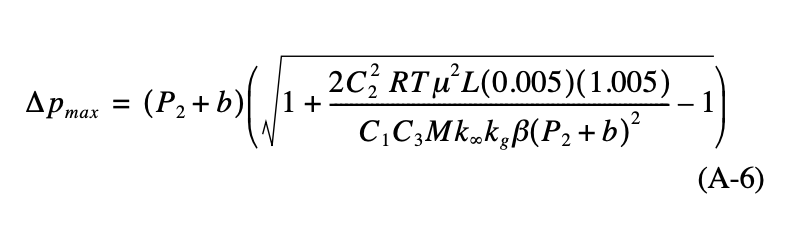



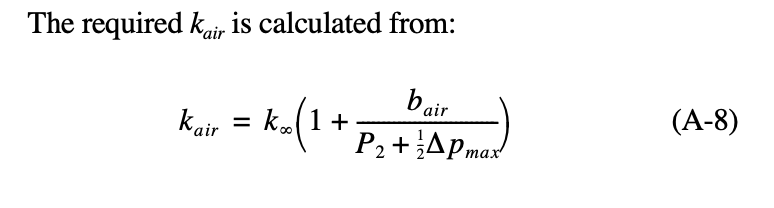

**Since delta_Pmax is our unknown, use kinf as our first guess for kair (kg in Equation A-6), and solve for delta_Pmax. Insert this value into Equation A-8 to solve for kair. Now use this value in Equation A-6 for kg, and iteratively continue to refine the estimates until there is no further change in ∆pmax. Convergence is usually achieved in 4 to 10 iterations.**

### We will first try to calculate a regression line from chart 6-3 of RP-40, Beta vs. Kinf from Jones and Geertsma, to create a regression equation to calculate beta from Kinf to use in our process.


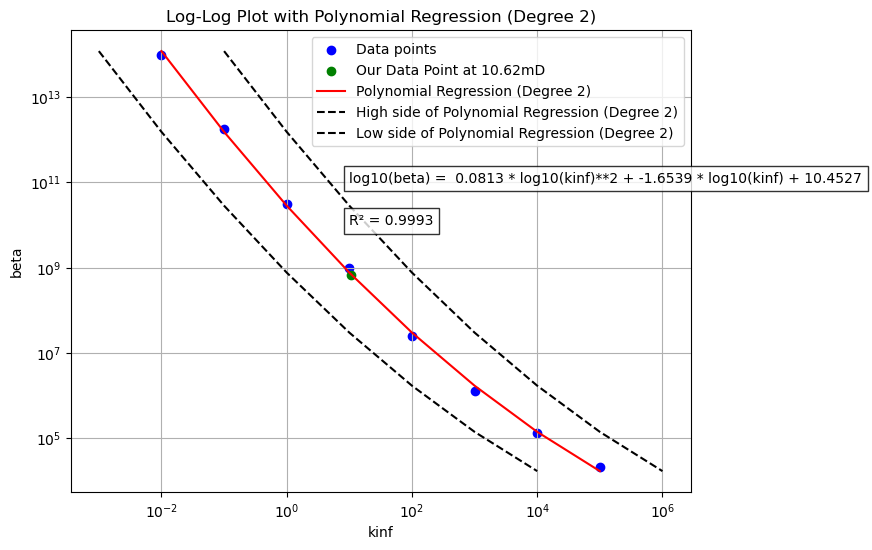

Equation for the polynomial regression (log-log scale):
log10(beta) =  0.0813 * log10(kinf)**2 + -1.6539 * log10(kinf) + 10.4527
[ 0.         -1.65386906  0.08125   ]
10.452678599757213


In [198]:
# Beta vs. Kinf taken from RP-40 chart 6-3, Jones and Geertsma

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Your data
kinf = np.array([0.01, 0.1, 1, 10, 100, 1000, 10000, 100000])
beta = np.array([1E+14, 1.77828E+12, 31622776602, 1000000000, 25118864.32, 1258925.412, 125892.5412, 19952.62315])

# Convert data to log10
log_kinf = np.log10(kinf)
log_beta = np.log10(beta)

# Reshape data for regression
log_kinf_reshaped = log_kinf.reshape(-1, 1)
log_beta_reshaped = log_beta

# Polynomial regression (quadratic)
poly_features = PolynomialFeatures(degree=2)
log_kinf_poly = poly_features.fit_transform(log_kinf_reshaped)

# Fit polynomial features
poly_model = LinearRegression()
poly_model.fit(log_kinf_poly, log_beta_reshaped)

# Predicted values
log_beta_pred = poly_model.predict(log_kinf_poly)

# Sort the values for plotting
sorted_indices = np.argsort(log_kinf_reshaped, axis=0)
log_kinf_sorted = log_kinf_reshaped[sorted_indices].reshape(-1, 1)
log_beta_pred_sorted = log_beta_pred[sorted_indices]

# Convert back to non-log scale for plotting
beta_pred = 10 ** log_beta_pred_sorted

# Calculate R-squared
r_squared = r2_score(log_beta, log_beta_pred)

# Get the coefficients
coefficients = poly_model.coef_
intercept = poly_model.intercept_

# Display equation
equation = f"log10(beta) =  {coefficients[2]:.4f} * log10(kinf)**2 + {coefficients[1]:.4f} * log10(kinf) + {intercept:.4f}"

kinf_mD = 10.62        # Input kinf in millidarcys
β_ours = 10**(0.0813*np.log10(kinf_mD)**2 - 1.6539*np.log10(kinf_mD) + 10.427)


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(kinf, beta, color='blue', label='Data points')
plt.scatter(kinf_mD, β_ours, color='green', label='Our Data Point at 10.62mD')
plt.plot(10 ** log_kinf_sorted, beta_pred, color='red', label='Polynomial Regression (Degree 2)')
plt.plot(10 ** log_kinf_sorted*10, beta_pred, color='black',linestyle="dashed", label='High side of Polynomial Regression (Degree 2)')
plt.plot(10 ** log_kinf_sorted*0.1, beta_pred, color='black', linestyle="dashed", label='Low side of Polynomial Regression (Degree 2)')
#plt.plot(10 ** log_kinf_sorted, beta_pred*100, color='green', linestyle="dashed", label='Low side of Polynomial Regression (Degree 2)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('kinf')
plt.ylabel('beta')
plt.title('Log-Log Plot with Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.text(1E+1, 1E+11, equation, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(1E+1, 1E+10, f"R² = {r_squared:.4f}", fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

print("Equation for the polynomial regression (log-log scale):")
print(equation)



print(poly_model.coef_)
print(poly_model.intercept_)


## Now use this equation to calculate beta for our calculations:

In [203]:
import numpy as np

"""
# For our first guess we use k∞ for kg in Equation A-6 and solve for delta_Pmax. 
# we then insert this value into Equation A-8 and solve for kair.
"""


# Example usage:
P2_psi = 18            # Input P2 in psi
Tc = 75                # Air Temperature in DegF for kg
T_degK = (Tc - 32) / 1.8 + 273.15  # Input temperature in Kelvin
viscosity_gas_cp = ((14.969 * T_degK ** 1.5) / (T_degK + 120)) * 0.0001  # Input gas viscosity in cp
L_cm = 2 * 2.54        # Input L in cm
kinf_mD = 10.62        # Input kinf in millidarcys

# Constants
C1 = 6.8046e-2       # Get the value for C1 from Table 6-1
C2 = 1000            # Get the value for C2 from Table 6-1
C3 = 3.2379e-8       # Get the value for C3 from Table 6-1
R = 1205.8           # Get the value for R from Table 6-1
gas_mol_weight = 29  # Gas molar weight

# Calculate b_air
b_air = 5.71 * kinf_mD ** -0.382

#β = 1000000000000
# We are adjusting beta to the high side of the regression by multiplying our regression equation x 100
β = 10**(0.0813*np.log10(kinf_mD)**2 - 1.6539*np.log10(kinf_mD) + 10.427)    *  100


kair = kinf_mD  # Initialize guess for kair using kinf_mD

delta_Pmax=(P2_psi+b_air)*np.sqrt(1+ 2*(C2**2)*R*T_degK*(viscosity_gas_cp**2)*L_cm*(0.005)*(1.005)/(C1*C3*gas_mol_weight*kinf_mD*kair*β*(P2_psi+b_air)**2)-1)

kair_new = kinf_mD * (1 + b_air / (P2_psi + 0.5 * delta_Pmax))


#delta_Pmax, kair = calculate_kair(P2_psi, T_degK, viscosity_gas_cp, L_cm, kinf_mD)
print("Delta_Pmax:", round(delta_Pmax, 2))
print("kair_new:", round(kair_new, 2))


Delta_Pmax: 3.62
kair_new: 11.86


In [204]:
"""
# Now use this value in Equation A-6 for kg, 
# and iteratively continue to refine the estimates 
# until there is no further change in delta_Pmax. 
# Convergence is usually achieved in 4 to 10 iterations
"""


kair = kair_new   # Initialize kair with kinf_mD

delta_Pmax=(P2_psi+b_air)*np.sqrt(1+ 2*(C2**2)*R*T_degK*(viscosity_gas_cp**2)*L_cm*(0.005)*(1.005)/(C1*C3*gas_mol_weight*kinf_mD*kair*β*(P2_psi+b_air)**2)-1)

kair_new = kinf_mD * (1 + b_air / (P2_psi + 0.5 * delta_Pmax))

#delta_Pmax, kair = calculate_kair(P2_psi, T_degK, viscosity_gas_cp, L_cm, kinf_mD)
print("Delta_Pmax:", round(delta_Pmax, 2))
print("kair_new:", round(kair_new, 2))


Delta_Pmax: 3.43
kair_new: 11.87


In [205]:
kair = kair_new   # Initialize kair with kinf_mD

delta_Pmax=(P2_psi+b_air)*np.sqrt(1+ 2*(C2**2)*R*T_degK*(viscosity_gas_cp**2)*L_cm*(0.005)*(1.005)/(C1*C3*gas_mol_weight*kinf_mD*kair*β*(P2_psi+b_air)**2)-1)

kair_new = kinf_mD * (1 + b_air / (P2_psi + 0.5 * delta_Pmax))

#delta_Pmax, kair = calculate_kair(P2_psi, T_degK, viscosity_gas_cp, L_cm, kinf_mD)
print("Delta_Pmax:", round(delta_Pmax, 2))
print("kair_new:", round(kair_new, 2))


Delta_Pmax: 3.42
kair_new: 11.87


In [206]:
kair = kair_new   # Initialize kair with kinf_mD

delta_Pmax=(P2_psi+b_air)*np.sqrt(1+ 2*(C2**2)*R*T_degK*(viscosity_gas_cp**2)*L_cm*(0.005)*(1.005)/(C1*C3*gas_mol_weight*kinf_mD*kair*β*(P2_psi+b_air)**2)-1)

kair_new = kinf_mD * (1 + b_air / (P2_psi + 0.5 * delta_Pmax))

#delta_Pmax, kair = calculate_kair(P2_psi, T_degK, viscosity_gas_cp, L_cm, kinf_mD)
print("Delta_Pmax:", round(delta_Pmax, 2))
print("kair_new:", round(kair_new, 2))


Delta_Pmax: 3.42
kair_new: 11.87


## The calculation for kair is 11.87, which should be 11.97. Our calculated beta could be too low for this sample, and a higher beta would calculate a higher kair. 